# Unieversity of Pavia
## Artificial Intelligence BSc
### Information Retrieval and Recommender Systems

### Authors:
 - Michele Ventimiglia
 - Manuel Dellabona

This script is part of the Clinic Trials SE project and is released under the GNU General Public License:
https://www.gnu.org/licenses/gpl-3.0.html#license-text

In [1]:
from _setup import check
check(verbose=True)

(i) [SETUP] Checking for virtual environment...
SUCCESS: [SETUP] Virtual environment detected!
(i) [SETUP] Path root added to the environment variables.
SUCCESS: [SETUP] Check completed!


In [2]:
import os
import re
import pickle
from collections import Counter
from concurrent.futures import ThreadPoolExecutor

import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from wordcloud import WordCloud

from src.tools.logging import Logger

Setup a logger

In [3]:
logger = Logger(
    id = 'Analysis',
    log_file_path = None,
    raise_errors = True,
    verbose = True
)

Setup spaCy

In [4]:
try:
    nlp = spacy.load("en_core_web_sm")

except:
    try:
        logger.info(f"Downloading spaCy files...")
        os.system("python -m spacy download en_core_web_sm --quiet")

    except Exception as e:
        logger.error(f"Error loading spaCy model: {e}")

Load the dataset

In [5]:
TREC21 = "path\\to\\ClinicalTrialsSE\\data\\TREC21.pkl"

In [6]:
with open(TREC21, 'rb') as file:
    extracted_data = []
    
    while True:
        try:
            document = pickle.load(file)
            extracted_data.extend(document)
            
        except EOFError:
            break

df_ = pd.DataFrame(extracted_data)

Display the first few entries and the total number of documents

In [7]:
print(f'Total number of documents: {len(df_)}')
display(df_.head())

Total number of documents: 375580


,nct_id,brief_title,official_title,brief_summary,detailed_description,study_type,study_design_info_primary_purpose,condition,intervention_intervention_type,intervention_intervention_name,...,trials_keyword,condition_browse_mesh_term,intervention_browse_mesh_term,eligibility_criteria,eligibility_inclusion_criteria,eligibility_exclusion_criteria,eligibility_gender,eligibility_minimum_age,eligibility_maximum_age,eligibility_healthy_volunteers
0,NCT00976963,Single Dose Monurol for Treatment of Acute Cys...,Single Dose Monurol for Treatment of Acute Cys...,Urinary tract infecton (UTI) is a very common ...,Procedures subjects will undergo once they hav...,Interventional,Treatment,Urinary Tract Infection,Drug,Fosfomycin,...,UTI,Urinary Tract Infections,Fosfomycin,Inclusion Criteria:\r\n\r\n - Non pr...,:\r\n\r\n - Non pregnant women in go...,":\r\n\r\n - Pregnant, lactating, or ...",Female,18 Years,45 Years,Accepts Healthy Volunteers
1,NCT00976573,"Carboplatin, Paclitaxel, and Bevacizumab With ...","A Randomized Phase II Trial of Carboplatin, Pa...",This randomized phase II trial is studying how...,OBJECTIVES:\r\n\r\n Primary\r\n\r\n ...,Interventional,Treatment,Melanoma (Skin),Biological,bevacizumab,...,"Stage IV Skin Melanoma, recurrent melanoma",Melanoma,"Paclitaxel, Bevacizumab, Carboplatin, Everolimus",Inclusion Criteria:\r\n\r\n - Histol...,:\r\n\r\n - Histologic proof of stag...,- Prior treatment with agents disrupting vasc...,All,18 Years,N/A,No
2,NCT00971139,Implementing Online Patient-Provider Communica...,Implementing Online Patient-Provider Communica...,"This interdisciplinary, international collabor...",A rapidly growing research literature document...,Interventional,Supportive Care,Cancer,Behavioral,Access to an OPPC service,...,"Online patient-provider communication, Organiz...",,,Inclusion Criteria:\r\n\r\n - 18 yea...,:\r\n\r\n - 18 years of age.\r\n\r\n...,:\r\n\r\n - Excluded are patients wh...,All,18 Years,N/A,No
3,NCT00977769,Carbetocin Versus Oxytocin and Hemodynamic Eff...,"Hemodynamic Effects of Carbetocin 100 µg, Oxyt...",A randomized double-blind trial of oxytocin 5 ...,Healthy pregnant women sheduled for elective c...,Interventional,Treatment,"Effects of; Anesthesia, in Pregnancy",Drug,carbetocin 100 µg,...,"cesarean delivery, blood pressure, cardiac output",,"Oxytocin, Carbetocin",Inclusion Criteria:\r\n\r\n - Health...,:\r\n\r\n - Healthy pregnant women f...,:\r\n\r\n - Bleeding disorders\r\n\r...,Female,18 Years,50 Years,No
4,NCT00976924,Clinical Test of Blood Glucose Test Strips,Clinical Test of Blood Glucose Test Strips,Blood glucose test strips are tested with the ...,,Interventional,Diagnostic,Diabetes,Device,blood glucose monitor,...,blood glucose,,,Inclusion Criteria:\r\n\r\n - The pa...,:\r\n\r\n - The patients with blood ...,:\r\n\r\n - The patients with blood ...,All,22 Years,78 Years,Accepts Healthy Volunteers


Describe the Dataframe

In [8]:
df_.describe()

,nct_id,brief_title,official_title,brief_summary,detailed_description,study_type,study_design_info_primary_purpose,condition,intervention_intervention_type,intervention_intervention_name,...,trials_keyword,condition_browse_mesh_term,intervention_browse_mesh_term,eligibility_criteria,eligibility_inclusion_criteria,eligibility_exclusion_criteria,eligibility_gender,eligibility_minimum_age,eligibility_maximum_age,eligibility_healthy_volunteers
count,375580,375580,375580,375580,375580,375580,375580,375580,375580,375580,...,375580,375580,375580,375580,375580,375580,375580,375580,375580,375580
unique,375580,373511,362581,372730,247916,5,11,58727,12,202466,...,225801,2976,28658,370583,366769,349964,4,248,455,3
top,NCT00976963,[Trial of device that is not approved or clear...,,,,Interventional,Treatment,Healthy,Drug,,...,,,,,,,All,18 Years,N/A,No
freq,1,841,10085,842,126028,292650,191257,7383,141625,39254,...,132421,65953,245037,932,1204,7560,320948,231211,178998,272139


Fucntion to preprocess the text

In [9]:
def preprocess_text(
        text: str
    ) -> list:
    
    clean_text = re.sub(r'\s+', ' ', text.replace('\n', ' ').replace('\r', ' ')).strip()
    doc = nlp(clean_text.lower())
    
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

Combine text from target columns for each row and preprocess

In [10]:
df = df_[:1000]

In [11]:
def process_row(row):
    combined_text = ' '.join(row[col] for col in ['brief_summary', 'detailed_description'] if pd.notnull(row[col]))
    return preprocess_text(combined_text)

In [12]:
with ThreadPoolExecutor() as executor:
    processed_tokens = list(tqdm(executor.map(process_row, df.to_dict('records')), total=len(df)))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
df['processed_tokens'] = processed_tokens

C:\Users\mikiv\AppData\Local\Temp\ipykernel_4940\1424544525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_tokens'] = processed_tokens


Flatten the list of tokens

In [14]:
all_tokens = [token for sublist in df['processed_tokens'] for token in sublist]

Term frequency

In [15]:
term_freq = pd.Series(all_tokens).value_counts()

In [16]:
print(term_freq)

study               2982
patient             2858
treatment           1367
dose                 781
day                  762
                    ... 
immunocompromise       1
tcad                   1
seamless               1
sharing                1
conceptual             1
Name: count, Length: 12029, dtype: int64


Word Cloud Visualization

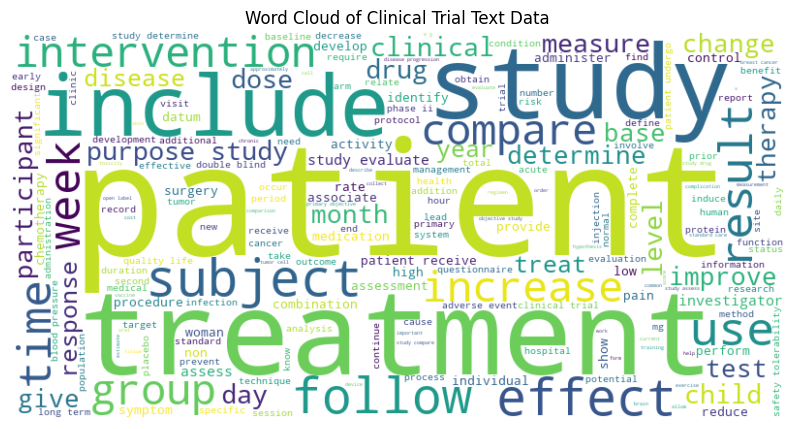

In [17]:
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white'
) \
.generate(' '.join(all_tokens))

plt.figure(figsize=(10, 6))
plt.imshow(
    X = wordcloud,
    interpolation = 'bilinear'
)
plt.axis('off')
plt.title('Word Cloud of Clinical Trial Text Data')
plt.show()

Bar Plot for Top N Words

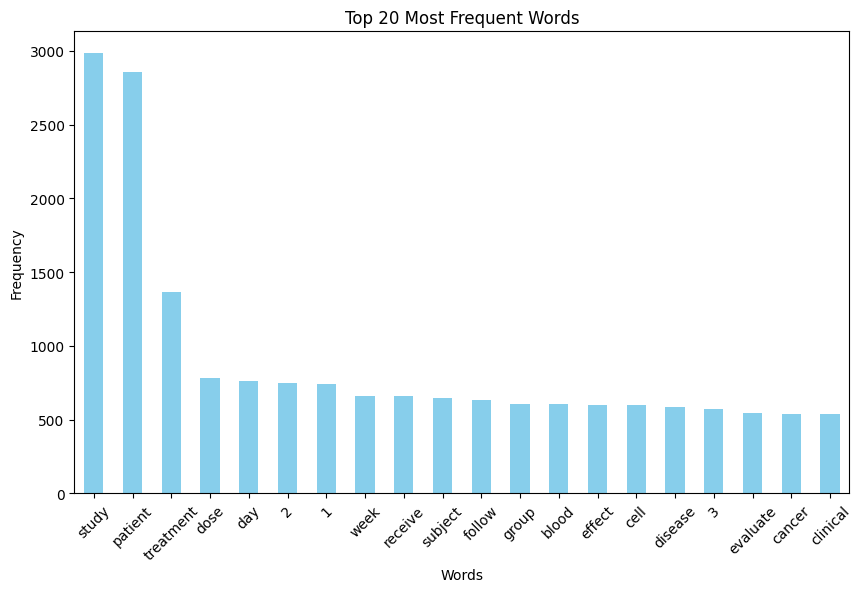

In [25]:
top_n = 20

plt.figure(figsize=(10, 6))
term_freq.head(top_n).plot(
    kind = 'bar',
    color = 'skyblue'
)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Distribution of Study Types

C:\Users\mikiv\AppData\Local\Temp\ipykernel_4940\312869809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


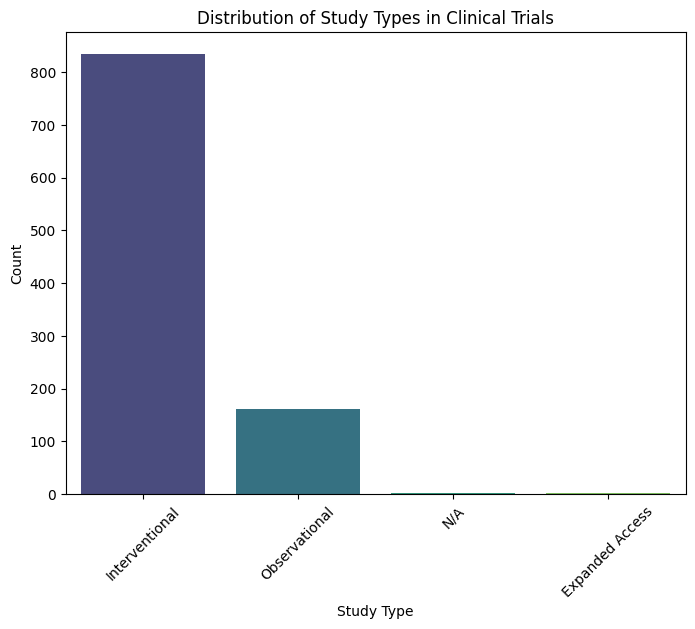

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data = df,
    x = 'study_type',
    palette = 'viridis'
)
plt.title('Distribution of Study Types in Clinical Trials')
plt.xlabel('Study Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Top 10 Conditions in Clinical Trials

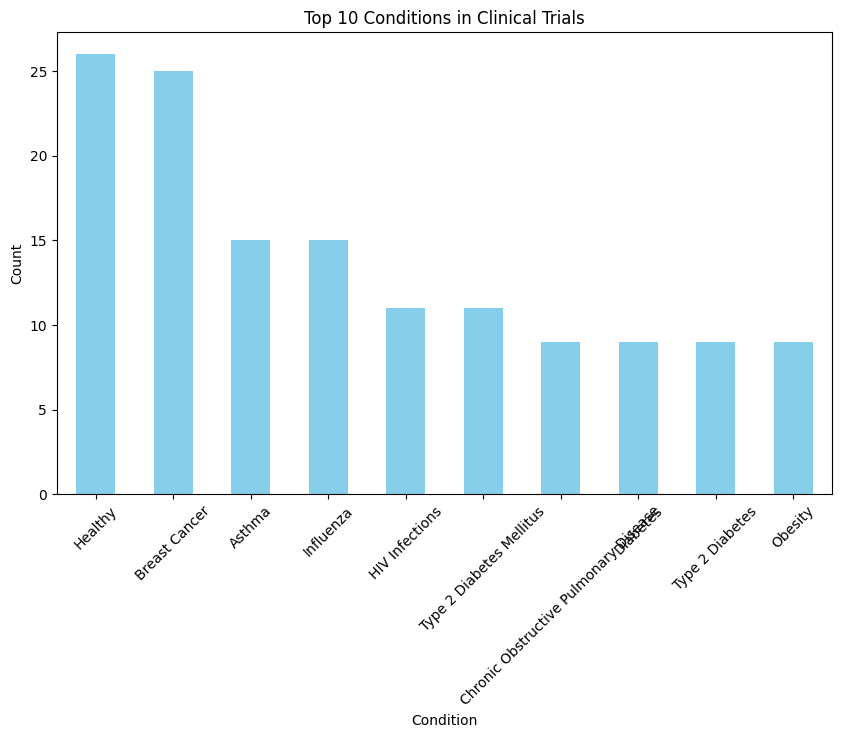

In [20]:
top_conditions = df['condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_conditions.plot(
    kind = 'bar',
    color = 'skyblue'
)
plt.title('Top 10 Conditions in Clinical Trials')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Intervention Types

C:\Users\mikiv\AppData\Local\Temp\ipykernel_4940\646958212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


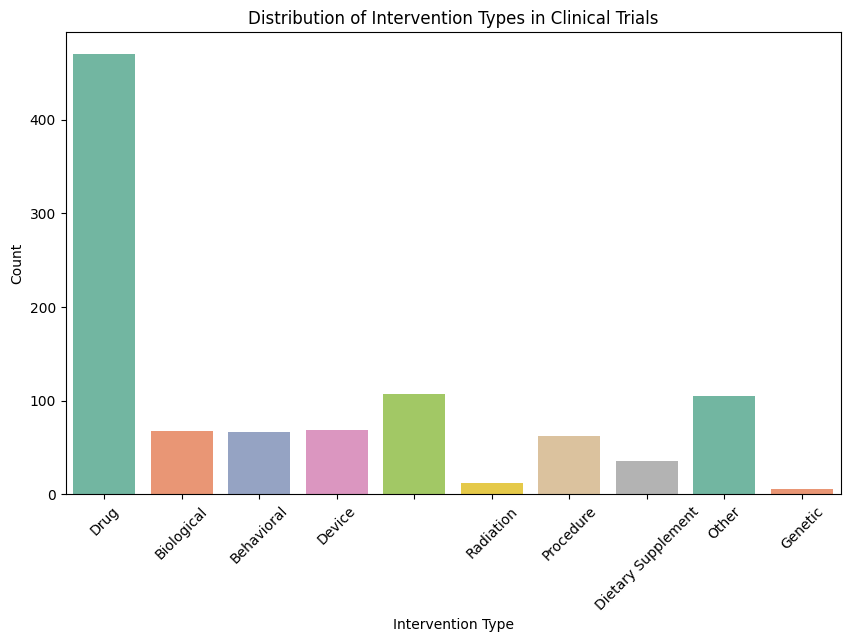

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data = df,
    x = 'intervention_intervention_type',
    palette = 'Set2'
)
plt.title('Distribution of Intervention Types in Clinical Trials')
plt.xlabel('Intervention Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Plot top word frequencies from the 'text_column'

C:\Users\mikiv\AppData\Local\Temp\ipykernel_4940\2142188878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


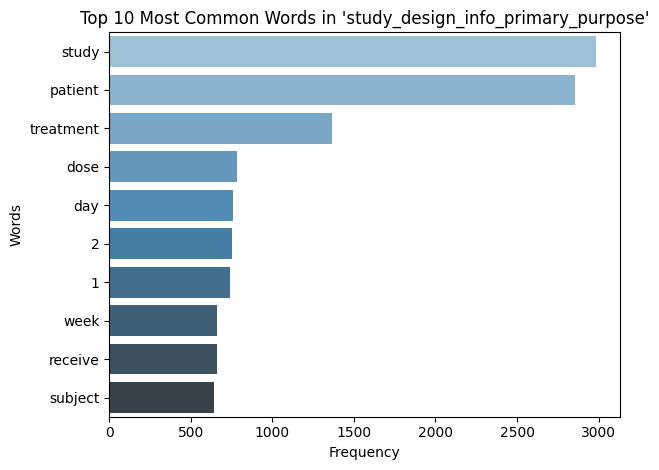

In [22]:
def plot_top_n_words(
        df: pd.DataFrame,
        column_name: str,
        top_n: int = 20
    ) -> None:
    
    word_freq = Counter(all_tokens)
    top_words = word_freq.most_common(top_n)

    sns.barplot(
        x = [freq for word, freq in top_words],
        y = [word for word, freq in top_words],
        palette = "Blues_d"
    )
    plt.title(f"Top {top_n} Most Common Words in '{column_name}'")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

plot_top_n_words(
    df = df,
    column_name = 'study_design_info_primary_purpose',
    top_n = 10
)